# Лабораторная работа 9. Алгоритмы на графах.

In [3]:
import networkx as nx
import pylab
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'networkx'

Пусть задан грав множеством смежности:

In [4]:
pos = {0: {1, 2},
       1: {3, 4},
       2: {1, 4},
       3: {4},
       4: {1, 3, 5},
       5: {0, 2}}

Создадим соответствующий направленный граф (https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html)

In [5]:
N = len(pos)
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G)

pylab.figure ()
plt.show()

NameError: name 'nx' is not defined

# 1. Алгоритмы обхода графа.

Во многих приложениях нужно уметь выписывать все вершины графа по одному разу, начиная с некоторой. Это делается с помощью обходов в глубину или в ширину.

Основная идея обходов:

- на каждом шаге рассмотреть очередную необработанную вершину;
- пометить эту вершину некоторым образом;
- до/после обработки данной вершины осуществить обход из всех нерассмотренных соседей.

Для упорядочивания вершин используется очередь (обход в ширину) или стек (обход в глубину).

# 1.1. Поиск в ширину.

Код программы реализующий поиск в ширину (с записью предшественников):

In [46]:
def bfs(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0                          # уровень начальной вершины
    queue = [s]                           # добавляем начальную вершину в очередь
    while queue:                          # пока там что-то есть
        v = queue.pop(0)                  # извлекаем вершину
        for w in graph[v]:                # запускаем обход из вершины v
            if level[w] is None:          # проверка на посещенность
                queue.append(w)           # добавление вершины в очередь
                parents[w] = v
                level[w] = level[v] + 1   # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level, parents

И программы востанавливающий маршрут:

In [47]:
def PATH (end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

# 1.2. Поиск в глубину.

Код программы реализующий поиск в ширину (с записью предшественников):

In [48]:
def dfs(graph, s, out=0):
    level = {v: None for v in graph}   
    level[s] = 0                                # уровень начальной вершины
    queue = [s]                                 # добавляем начальную вершину в очередь
    while queue:                                # пока там что-то есть
        v = queue.pop(-1)                       # извлекаем вершину
        for w in graph[v]:                      # запускаем обход из вершины v
            if level[w] is None:                # проверка на посещенность
                queue.append(w)                 # добавление вершины в очередь
                level[w] = level[v] + 1         # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level

In [49]:
dfs(pos, 0, 1)

1 {0: 0, 1: 1, 2: 1, 3: None, 4: None, 5: None} [1, 2]
2 {0: 0, 1: 1, 2: 1, 3: None, 4: 2, 5: None} [1, 4]
3 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3, 5]
1 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} []


{0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3}

In [50]:
pos[2]

{1, 4}

# Пример 1.

Определим с помощью поиска в ширину кратчайший маршрут:

In [51]:
level, parents = bfs(pos, 0, out=0)

In [52]:
level

{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3}

In [53]:
parents

{0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}

In [54]:
path = PATH(5, parents)
print(path)

[0, 1, 4, 5]


Визуализируем этот маршрут:

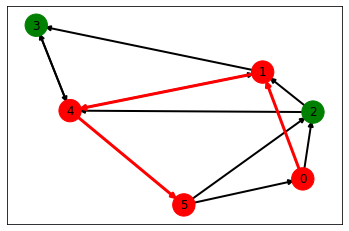

In [60]:
red_node = set(path)                                                # вершины маршрута
red_edges = [ (path[i],path[i+1]) for i in range(len(path)-1) ]     # рёбра маршрута

# разделение по цветам вершин и рёбер
node_colours = ['g' if not node in red_node else 'red' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# построение графа
#p = nx.spring_layout(G)

p = {0: [ 0.38144628, -0.66882419],
 1: [0.23970166, 0.49135202],
 2: [0.41724407, 0.05678197],
 3: [-0.55966794,  1.        ],
 4: [-0.44016179,  0.07245783],
 5: [-0.03856228, -0.95176763]}

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color = node_colours, node_size = 500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=black_edges, width =2.0, edge_color='k', arrows=True)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width =3.0, edge_color='r', arrows=True)

plt.show()

In [58]:
# координаты вершин на рисунке
p

{0: array([-0.40360094, -0.66079341]),
 1: array([ 0.4629722 , -0.51435418]),
 2: array([0.00420363, 0.50546686]),
 3: array([0.92790401, 0.61646247]),
 4: array([0.0085211 , 0.01659068]),
 5: array([-1.        ,  0.03662757])}

# Упражнение 1

Две вершины (v и u) ориентированного графа называют сильно связными, если существует путь из v в u и существует путь из u в v. Ориентированный граф называется сильно связным, если любые две его вершины сильно связны.

Напишите функцию, использующую модифицированый алгоритм поиска в глубину (алгоритм Косарайю) для определения компонент сильой связности.

Алгоритм:

1. Инвертируем дуги исходного ориентированного графа.
2. Запускаем поиск в глубину на этом обращённом графе, запоминая, в каком порядке выходили из вершин.
3. Запускаем поиск в глубину на исходном графе, в очередной раз выбирая не посещённую вершину с максимальным номером в векторе, полученном в п.2.

Полученные из п.3 деревья и являются сильно связными компонентами.

Найдите и постройте графически с помощью этой функции компоенты сильной связности графа:

In [5]:
pos2 = {0: {1, 2},
        1: {3, 4},
        2: {1, 4},
        3: {4},
        4: {1, 3, 5},
        5: {0, 2},
        6: {3, 0, 5},
        7: {2, 1},
        8: {0, 7, 3},
        9: {2, 4, 6, 8}}

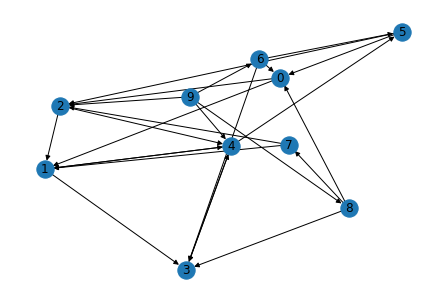

<Figure size 432x288 with 0 Axes>

In [25]:
N = 10
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos2[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G,with_labels=True)

pylab.figure ()
plt.show()

# Пример 2. Ход конём

Создадим две строки, комбинация которых даст нам обозночения всех клеток шахматного поля:

In [26]:
letters = 'abcdefgh'
numbers = '12345678'

Создадим структуру типа слоарь для хранения графа в формате множества смежности:

In [27]:
graph = dict()
graph

{}

Заполним имена вершин графа:

In [28]:
for l in letters:
    for n in numbers:
        graph[l+n] = set()
graph

{'a1': set(),
 'a2': set(),
 'a3': set(),
 'a4': set(),
 'a5': set(),
 'a6': set(),
 'a7': set(),
 'a8': set(),
 'b1': set(),
 'b2': set(),
 'b3': set(),
 'b4': set(),
 'b5': set(),
 'b6': set(),
 'b7': set(),
 'b8': set(),
 'c1': set(),
 'c2': set(),
 'c3': set(),
 'c4': set(),
 'c5': set(),
 'c6': set(),
 'c7': set(),
 'c8': set(),
 'd1': set(),
 'd2': set(),
 'd3': set(),
 'd4': set(),
 'd5': set(),
 'd6': set(),
 'd7': set(),
 'd8': set(),
 'e1': set(),
 'e2': set(),
 'e3': set(),
 'e4': set(),
 'e5': set(),
 'e6': set(),
 'e7': set(),
 'e8': set(),
 'f1': set(),
 'f2': set(),
 'f3': set(),
 'f4': set(),
 'f5': set(),
 'f6': set(),
 'f7': set(),
 'f8': set(),
 'g1': set(),
 'g2': set(),
 'g3': set(),
 'g4': set(),
 'g5': set(),
 'g6': set(),
 'g7': set(),
 'g8': set(),
 'h1': set(),
 'h2': set(),
 'h3': set(),
 'h4': set(),
 'h5': set(),
 'h6': set(),
 'h7': set(),
 'h8': set()}

Заполним множества смежности:

In [29]:
def add_edge(graph, v1, v2):
    graph[v1].add(v2)
    graph[v2].add(v1)              

In [30]:
for i in range(8):
    for j in range(8):
        v1 = letters[i]+numbers[j]
        v2 = ''
        if 0<=i+2<8 and 0<=j+1<8:
            v2 = letters[i+2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i-2<8 and 0<=j+1<8:
            v2 = letters[i-2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i+1<8 and 0<=j+2<8:
            v2 = letters[i+1]+numbers[j+2]
            add_edge(graph, v1, v2)            
            
        if 0<=i-1<8 and 0<=j+2<8:
            v2 = letters[i-1]+numbers[j+2]
            add_edge(graph, v1, v2)  

In [31]:
graph

{'a1': {'b3', 'c2'},
 'a2': {'b4', 'c1', 'c3'},
 'a3': {'b1', 'b5', 'c2', 'c4'},
 'a4': {'b2', 'b6', 'c3', 'c5'},
 'a5': {'b3', 'b7', 'c4', 'c6'},
 'a6': {'b4', 'b8', 'c5', 'c7'},
 'a7': {'b5', 'c6', 'c8'},
 'a8': {'b6', 'c7'},
 'b1': {'a3', 'c3', 'd2'},
 'b2': {'a4', 'c4', 'd1', 'd3'},
 'b3': {'a1', 'a5', 'c1', 'c5', 'd2', 'd4'},
 'b4': {'a2', 'a6', 'c2', 'c6', 'd3', 'd5'},
 'b5': {'a3', 'a7', 'c3', 'c7', 'd4', 'd6'},
 'b6': {'a4', 'a8', 'c4', 'c8', 'd5', 'd7'},
 'b7': {'a5', 'c5', 'd6', 'd8'},
 'b8': {'a6', 'c6', 'd7'},
 'c1': {'a2', 'b3', 'd3', 'e2'},
 'c2': {'a1', 'a3', 'b4', 'd4', 'e1', 'e3'},
 'c3': {'a2', 'a4', 'b1', 'b5', 'd1', 'd5', 'e2', 'e4'},
 'c4': {'a3', 'a5', 'b2', 'b6', 'd2', 'd6', 'e3', 'e5'},
 'c5': {'a4', 'a6', 'b3', 'b7', 'd3', 'd7', 'e4', 'e6'},
 'c6': {'a5', 'a7', 'b4', 'b8', 'd4', 'd8', 'e5', 'e7'},
 'c7': {'a6', 'a8', 'b5', 'd5', 'e6', 'e8'},
 'c8': {'a7', 'b6', 'd6', 'e7'},
 'd1': {'b2', 'c3', 'e3', 'f2'},
 'd2': {'b1', 'b3', 'c4', 'e4', 'f1', 'f3'},
 'd3': {'b

Проведём сканирование графа в ширину:

In [61]:
start = 'd4'
end = 'f7'

level, parents = bfs(graph, start)

И прлучим маршрут коня:

In [62]:
PATH(end, parents)

['d4', 'f3', 'e5', 'f7']

# Упражнение 2.

Нарисуйте граф соответствующий маршрутам коня по шахматной доске и отметте на нём найденный маршрут.

In [6]:
G = nx.DiGraph()
a = [(i, j) for i in pt1 for j in graph[i]] # генерация списка рёбер


# red_node = set(path)                                                # вершины маршрута
# red_edges = [ (path[i],path[i+1]) for i in range(len(path)-1) ]     # рёбра маршрута

# # разделение по цветам вершин и рёбер
# node_colours = ['g' if not node in red_node else 'red' for node in G.nodes()]
# black_edges = [edge for edge in G.edges() if edge not in red_edges]




G.add_nodes_from(graph, color = "red")
G.add_edges_from(a)
node_colours = ['g' if node in pt1 else 'r']



# nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color = node_colours, node_size = 500)
# nx.draw_networkx_labels(G, p)
# nx.draw_networkx_edges(G, p, edgelist=black_edges, width =2.0, edge_color='k', arrows=True)
# nx.draw_networkx_edges(G, p, edgelist=red_edges, width =3.0, edge_color='r', arrows=True)


nx.draw(G, with_labels=True)
pylab.figure ()
plt.show()
a

NameError: name 'nx' is not defined

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


def knightGraph(bdSize):# Формируем неориентированный граф
    ktGraph = nx.Graph()
    for row in range(bdSize):
       for col in range(bdSize):
           nodeId = posToNodeId(row,col,bdSize)
           newPositions = genLegalMoves(row,col,bdSize)
           for e in newPositions:
               nid = posToNodeId(e[0],e[1],bdSize)
               ktGraph.add_edge(nodeId,nid,color='black')
    return ktGraph
def posToNodeId(row,col,bdSize):# Метка узла: определяется местоположением
    return row*bdSize+col
def genLegalMoves(x,y,bdSize):# Из местоположения (x, y), доступное местоположение
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   ( 1,-2),( 1,2),( 2,-1),( 2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = y + i[1]
        if legalCoord(newX,bdSize) and legalCoord(newY,bdSize):
            newMoves.append((newX,newY))
    return newMoves
def legalCoord(x,bdSize):# Будь то за бортом
    if x >= 0 and x < bdSize:
        return True
    else:
        return False

def knightTour(n,path,u,limit):
        kg.nodes[u]['color']='gray'# Перешел на этот узел
        #u.setColor('gray')
        path.append(u)# Добавить в очередь
        if n < limit:# Не найдено подходящего пути
            nbrList = list(kg.neighbors(u))# Следующая коллекция узлов с возможностью поиска
            i = 0
            done = False
            while i < len(nbrList) and not done:
                if kg.nodes[nbrList[i]]['color'] == 'white':# Узел не пройден
                    done = knightTour(n+1, path, nbrList[i], limit)
                i = i + 1
            if not done:  # prepare to backtrack
                path.pop()
                kg.nodes[u]['color']='white'# Установить, чтобы не искать
                #u.setColor('white')
        else:
            done = True
        return done

def orderByAvail(n):# Сортировка, сначала меньше точек
    resList = []
    for v in kg.neighbors(n):
        if kg.node[v]['color'] == 'white':# Вычислить количество соединенных ребер узлов, которые не были пройдены
            c = 0#count
            for w in kg.neighbors(v):
                if kg.nodes[w]['color'] == 'white':
                    c = c + 1
            resList.append((c,v))
    resList.sort(key=lambda x: x[0])# Сортировать по количеству сторон от маленького к большому
    return [y[1] for y in resList]
def knightTourBetter(n,path,u,limit):  #use order by available function
        kg.nodes[u]['color']='gray'
        #u.setColor('gray')
        path.append(u)
        if n < limit:
            nbrList = orderByAvail(u)
            i = 0
            done = False
            while i < len(nbrList) and not done:
                if kg.nodes[nbrList[i]]['color'] == 'white':
                    done = knightTourBetter(n+1, path, nbrList[i], limit)
                i = i + 1
            if not done:  # prepare to backtrack
                path.pop()
                kg.nodes[u]['color']='white'
        else:
            done = True
        return done
# n = int (input ("Размер доски:"))

n=6
kg = knightGraph(n)  #five by five solution
pos=[]
for i in range(n):
    for j in range(n):
        pos.append((i,j))
nx.draw(kg, pos, with_labels=True)# Нарисуйте неориентированный граф
plt.show()

thepath = []#путь
for i in range(n*n):
    kg.nodes[i]['color'] = 'white'
start = 4# Start node
knightTour(0,thepath,start,n*n-1)
print('Возможный путь:»')
for i in range(len(thepath)):# Выходной путь
    if i!=len(thepath)-1:
        print(thepath[i],end=' ->')
        kg[thepath[i]][thepath[i+1]]['color'] = 'blue'
    else:
        print(thepath[i])
nx.draw(kg,pos,with_labels=True,width=3,edge_color=[(v['color']) for x,y,v in kg.edges(data=True)])#
# Сторона, по которой ходили, синяя, а сторона, по которой не ходили, - черная
nx.draw_networkx(kg,pos,with_labels=True,edge_color='blue')
# nx.draw(kg,pos,with_labels=True,width=3,edge_color='black')
plt.show()

In [ ]:
Kpath = PATH(end, parents)

p = {}
for l in range(len(letters)):
    for n in range(len(numbers)):
        p[letters[l]+numbers[n]] = [-1 + l * 0.25, -1 + n * 0.25]

G = nx.DiGraph()
a = [(i, j) for i in graph for j in graph[i]]

G.add_edges_from(a)

#p = nx.spring_layout(G)
red_node = set(Kpath)
red_edges = [ (Kpath[i],Kpath[i+1]) for i in range(len(Kpath)-1) ]

node_colours = ['w' if not node in red_node else 'r' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width=1.0, edge_color='r', arrows=True)

pylab.figure()
plt.show()

# Упражнение 3. Раскраски.

Рассмотрим граф G(V,E), имеющий V вершин и E ребер. Раскраской графа G называется окрашивание вершин графа G такое, что никакие две смежные вершины не имеют одинаковый цвет. Хроматическое число графа X(G) - это наименьшее число цветов, которое используется для раскраски графа. Известен жадный алгоритм раскраски графа.

Жадный алгоритм последовательного раскрашивания:

Входные данные: граф G (V,E)
Выходные данные: массив c[v] раскрашенных вершин
1. Для всех вершин определить множество А ={1,2,3..,n} всех цветов.
2. Выбрать стартовую вершину (с которой начинаем алгоритм). Раскрасить вершину в цвет color. Вычеркнуть этот цвет из множества цветов всех вершин, смежных со стартовой.
3. Выбрать не раскрашенную вершину v
4. Раскрасить выбранную вершину в минимально возможный цвет из множества А. Вычеркнуть этот цвет из множества цветов всех вершин, смежных с вершиной v.
5. Проделать шаг 3, шаг 4 для всех нераскрашенных вершин графа.

На основе этого алгоритма раскрасьте граф из задачи про коня.

In [23]:
def ggca(graph):
    colors = {i: None for i in graph.keys()}
    for i in graph.keys():
        minimal_set = []
        for s in graph[i]:
            if colors[s] is not None:
                minimal_set.append(colors[s])
        for c in range(len(graph)):
            if c not in minimal_set:
                colors[i] = c
                break
    return colors

r = ggca(graph)
r

NameError: name 'graph' is not defined

In [ ]:
G = nx.DiGraph()
a = [(i, j) for i in graph for j in graph[i]]

G.add_edges_from(a)

#p = nx.spring_layout(G)

node_colours = ['b' if r[node] == 0 else 'r' if r[node] == 1 else 'g' for node in G.nodes()]

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)

pylab.figure()
plt.show()

# Домашнее задание (базовое):

# Задание 1. Алгоритм Дейкстры

Напишите функцию реализуущую алгоритм Дейкстры.

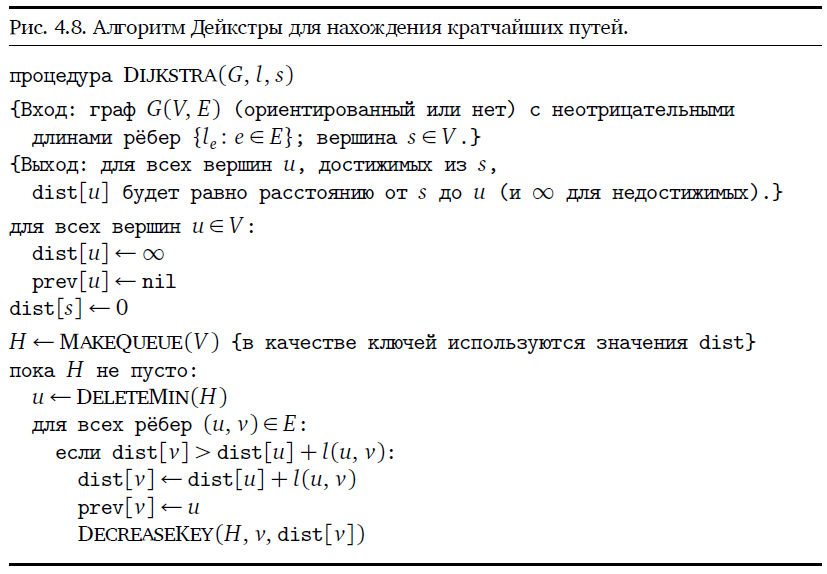

In [228]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Dijkstra.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [ ]:
import sys

class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]
    
    def min_distance(self, dist, sptSet):
        min = sys.maxsize
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
        return min_index
    
    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        for cout in range(self.V):
            u = self.min_distance(dist, sptSet)
            sptSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    dist[v] = dist[u] + self.graph[u][v]
        self.show(dist)
    
    def show(self, dist):
        print("Вершина  Расстояние до источника")
        for node in range(self.V):
            print(node, "\t", dist[node])

In [ ]:
nodes = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
distances = {
    'B': {'A': 5, 'D': 1, 'G': 2},
    'A': {'B': 5, 'D': 3, 'E': 12, 'F' :5},
    'D': {'B': 1, 'G': 1, 'E': 1, 'A': 3},
    'G': {'B': 2, 'D': 1, 'C': 2},
    'C': {'G': 2, 'E': 1, 'F': 16},
    'E': {'A': 12, 'D': 1, 'C': 1, 'F': 2},
    'F': {'A': 5, 'E': 2, 'C': 16}}

unvisited = {node: None for node in nodes} #using None as +inf
visited = {}
current = 'B'
currentDistance = 0
unvisited[current] = currentDistance

while True:
    for neighbour, distance in distances[current].items():
        if neighbour not in unvisited: continue
        newDistance = currentDistance + distance
        if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
            unvisited[neighbour] = newDistance
    visited[current] = currentDistance
    del unvisited[current]
    if not unvisited: break
    candidates = [node for node in unvisited.items() if node[1]]
    current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]

print(visited)

In [ ]:
import heapq as hq
import math

def dijkstra(G, s):
    n = len(G)
    visited = [False]*n
    weights = [math.inf]*n
    path = [None]*n
    queue = []
    weights[s] = 0
    hq.heappush(queue, (0, s))
    while len(queue) > 0:
        g, u = hq.heappop(queue)
        visited[u] = True
        for v, w in G[u]:
            if not visited[v]:
                f = g + w
                if f < weights[v]:
                    weights[v] = f
                    path[v] = u
                    hq.heappush(queue, (f, v))
    return path, weights

G = [[(1, 6), (3, 7)],
     [(2, 5), (3, 8), (4, -4)],
     [(1, -2), (4, 7)],
     [(2, -3), (4, 9)],
     [(0, 2)]]

print(dijkstra(G, 0))

In [ ]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

# Задание 2. 

Сгенерируйте случайный взвешенный граф. И определите на нём маршрут минимальной длины с помощью алгоритма Дейкстры.

In [ ]:
import random

G = nx.gnm_random_graph(6,7)


#for (u,v,w) in G.edges(data=True):
    #w['weight'] = random.randint(0,10)

for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

nx.draw(G, label= True)
pylab.figure()
plt.show()

nx.shortest_path(G, source=None, target=None, weight=None, method='dijkstra')

In [ ]:
import random

from datetime import datetime

random.seed(datetime.now())
size = int(random.uniform(4, 17))
w = [[0] * size] * size
for i in range(len(w)):
    for j in range(len(w[i])):
        w[i][j] = int(random.uniform(0, 101))
        
g = Graph(size)
g.graph = w

g.dijkstra(0)

# Задание 3.

Проиллюстрируйте работу одного из алгоритмов (поиска в ширину или глубину, Дейкстры) с помощью визуализации действий с графом на каждой итерации с помощью библиотек networkx и matplotlib, аналогично примеру 1.

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('s', 'u', 10), ('s', 'x', 5), ('u', 'v', 1), ('u', 'x', 2), 
    ('v', 'y', 1), ('x', 'u', 3), ('x', 'v', 5), ('x', 'y', 2), 
    ('y', 's', 7), ('y', 'v', 6)])
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
shortest_path_s_v = nx.reconstruct_path('s', 'v', predecessors)
edges = [(a,b) for a,b in zip(shortest_path_s_v, shortest_path_s_v[1:])]
weights = nx.get_edge_attributes(G, 'weight')
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="r", width=3)
title = "Shortest path between [{}] and [{}]: {}"\
        .format("s", "v", " -> ".join(shortest_path_s_v))
plt.title(title)

In [ ]:
pos = {0: {1, 2},
       1: {3, 4},
       2: {1, 4},
       3: {4},
       4: {1, 3, 5},
       5: {0, 2}}

In [ ]:
import time
# поиск в ширину `bfs(graph, start)` и граф, заданный множеством смежности `pos`
G = nx.DiGraph()
a = [(i, j) for i in pos for j in pos[i]]

G.add_edges_from(a)
node_colours = ['b' for node in G.nodes()]
edges = [i for i in G.edges()]
p = nx.spring_layout(G)

pylab.figure()
plt.show()

def redraw(prev, curr):
    if prev:
        node_colours[prev] = 'b'
    node_colours[curr] = 'r'
    nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
    nx.draw_networkx_labels(G, p)
    nx.draw_networkx_edges(G, p, edgelist=edges, width=1.0, edge_color='k', arrows=True)
    pylab.figure()
    plt.show()

def bfs_vis(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0
    queue = [s]
    prev = None
    while queue:
        v = queue.pop(0)
        redraw(prev, v)
        prev = v
        time.sleep(1)
        for w in graph[v]:
            if level[w] is None:
                queue.append(w)
                parents[w] = v
                level[w] = level[v] + 1
        if out: print(level[w], level, queue)
    return level, parents

time.sleep(1)

bfs_vis(pos, 0)

# Задание 4. В библиотеке.

Используйте какой-нибудь интересный алгоритм из https://networkx.github.io/documentation/stable/reference/algorithms/index.html

In [ ]:
print('Радиус построенного нами выше графа равен ', nx.algorithms.distance_measures.radius(G),'\n','Центром является множество узлов с эксцентриситетом, равным радиусу ', *nx.algor

In [ ]:
G=nx.cubical_graph()
nx.draw(G, label=True)   # тип по умолчанию spring_layout
nx.draw(G,pos=nx.spectral_layout(G), edge_color='r')

# Домашнее задание (дополнительное):

# Задание. Картинка.

Существует много способов кодирования изображений. Рассмотрим два из них. Пусть изображения состоят только из чёрных и белых пикселей. В каждом из них есть хотя бы один чёрный пиксель, и все чёрные пиксели составляют одну связанную область (соединены сторонами друг с другом). 

Оба представления описывают расположение только чёрных пикселей.

Первое представление задаёт в первой строке количество чёрных пикселей, а в следующих строках — координаты каждого чёрного пикселя. Пиксели перечислены в порядке возрастания X-координат. В случае равенства X-координат они перечислены в порядке возрастания Y-координат. Изображение, показанное на рисунке, кодируется следующим образом:

6

2 3

2 4

3 3

3 4

4 2

4 3

Второе представление задаёт в первой строке координаты самого нижнего из самых левых чёрных пикселей. Каждая из следующих строк содержит описание соседей одного из пикселей. Сначала описываются соседи самого нижнего из самых левых пикселей, затем описываются соседи его первого соседа (если он существует), затем соседи его второго соседа (если он также существует). Когда все непосредственные соседи описаны, следует описание соседей первого соседа, затем описание соседей второго соседа и так далее.

Каждая строка описания содержит не более одной буквы для каждого из соседей: R для правого, T для верхнего, L для левого, B для нижнего. Если сосед уже был описан, он не включается в строку описания, если ещё не был — включается. Каждый пиксель описывается одной строкой. Соседи перечисляются в порядке против часовой стрелки, начиная с правого. Каждая строка описания, кроме последней, заканчивается запятой. Последняя строка заканчивается точкой. Изображение, показанное на рисунке, кодируется следующим образом:

2 3

RT,

RT,

,

B,

,

.

Закодированное таким образом изображение имеет следующий вид. 

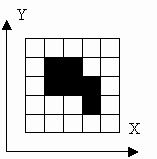

In [1]:
# Так можно добавлять картинки

from IPython.display import Image              # вызов из библиотеки определённой функции
Image("Кодирование изображений (Графы).png")   # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

Напишите программу выполняющую изменение кодировки из первого формата во второй и выводящую соответствующее изображение на экран. Начальное и переконвертированное изображение должно храниться в файлах с соответствующими размерностями: .format1 и .format2.

# Задание. Алгоритм Форда - Беллмана

Напишите функцию реализуущую алгоритм Форда - Беллмана
(https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B5%D0%BB%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BE%D1%80%D0%B4%D0%B0).

In [7]:
import math

def ford_bellman(W, start):
    N = len(W)
    F = [[math.inf] * N for i in range(N)]
    F[0][start] = 0 
    for k in range(1, N): 
        for i in range(N): 
            F[k][i] = F[k - 1][i]
            for j in range(N):
                if F[k - 1][j] + W[j][i] < F[k][i]:
                    F[k][i] = F[k - 1][j] + W[j][i]
    return F

W = [[1, 2, 3],
     [1, 2, 9],
     [9, 5, 1]]

ford_bellman(W, 0)

[[0, inf, inf], [0, 2, 3], [0, 2, 3]]

# Задание. Лабирит.

Найдите выход из лабирита с помощью различных алгоритмов и сравите их. (Взвести рёбра пропорционально их длине.)

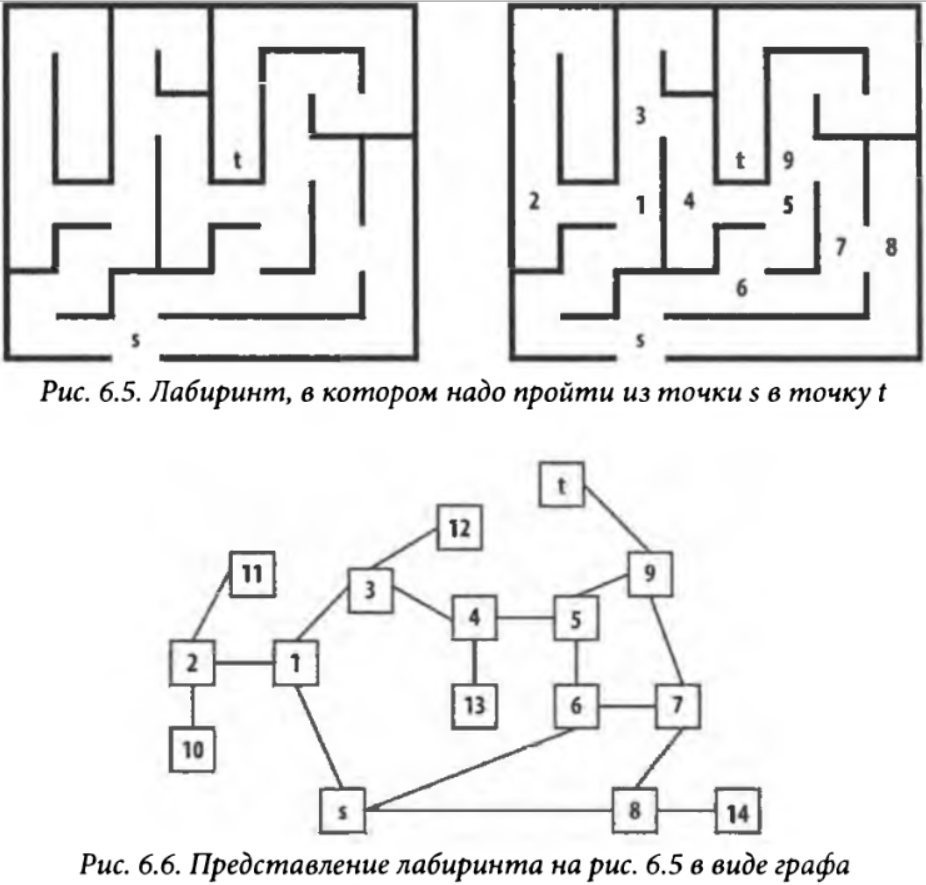

In [2]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Лабиринт.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [ ]:
# !pip install mortoray_path_finding  
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Лабиринт.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [21]:
from PIL import Image, ImageDraw
images = []

a = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0 ,0, 0, 0, 1, 0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0 ,0, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0 ,0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]
zoom = 20
borders = 6
start = 1,1
end = 5,19

def make_step(k):
  for i in range(len(m)):
    for j in range(len(m[i])):
      if m[i][j] == k:
        if i>0 and m[i-1][j] == 0 and a[i-1][j] == 0:
          m[i-1][j] = k + 1
        if j>0 and m[i][j-1] == 0 and a[i][j-1] == 0:
          m[i][j-1] = k + 1
        if i<len(m)-1 and m[i+1][j] == 0 and a[i+1][j] == 0:
          m[i+1][j] = k + 1
        if j<len(m[i])-1 and m[i][j+1] == 0 and a[i][j+1] == 0:
           m[i][j+1] = k + 1

def print_m(m):
    for i in range(len(m)):
        for j in range(len(m[i])):
            print( str(m[i][j]).ljust(2),end=' ')
        print()

def draw_matrix(a,m, the_path = []):
    im = Image.new('RGB', (zoom * len(a[0]), zoom * len(a)), (255, 255, 255))
    draw = ImageDraw.Draw(im)
    for i in range(len(a)):
        for j in range(len(a[i])):
            color = (255, 255, 255)
            r = 0
            if a[i][j] == 1:
                color = (0, 0, 0)
            if i == start[0] and j == start[1]:
                color = (0, 255, 0)
                r = borders
            if i == end[0] and j == end[1]:
                color = (0, 255, 0)
                r = borders
            draw.rectangle((j*zoom+r, i*zoom+r, j*zoom+zoom-r-1, i*zoom+zoom-r-1), fill=color)
            if m[i][j] > 0:
                r = borders
                draw.ellipse((j * zoom + r, i * zoom + r, j * zoom + zoom - r - 1, i * zoom + zoom - r - 1),
                               fill=(255,0,0))
    for u in range(len(the_path)-1):
        y = the_path[u][0]*zoom + int(zoom/2)
        x = the_path[u][1]*zoom + int(zoom/2)
        y1 = the_path[u+1][0]*zoom + int(zoom/2)
        x1 = the_path[u+1][1]*zoom + int(zoom/2)
        draw.line((x,y,x1,y1), fill=(255, 0,0), width=5)
    draw.rectangle((0, 0, zoom * len(a[0]), zoom * len(a)), outline=(0,255,0), width=2)
    images.append(im)


m = []
for i in range(len(a)):
    m.append([])
    for j in range(len(a[i])):
        m[-1].append(0)
i,j = start
m[i][j] = 1

k = 0
while m[end[0]][end[1]] == 0:
    k += 1
    make_step(k)
    draw_matrix(a, m)


i, j = end
k = m[i][j]
the_path = [(i,j)]
while k > 1:
  if i > 0 and m[i - 1][j] == k-1:
    i, j = i-1, j
    the_path.append((i, j))
    k-=1
  elif j > 0 and m[i][j - 1] == k-1:
    i, j = i, j-1
    the_path.append((i, j))
    k-=1
  elif i < len(m) - 1 and m[i + 1][j] == k-1:
    i, j = i+1, j
    the_path.append((i, j))
    k-=1
  elif j < len(m[i]) - 1 and m[i][j + 1] == k-1:
    i, j = i, j+1
    the_path.append((i, j))
    k -= 1
  draw_matrix(a, m, the_path)

for i in range(10):
    if i % 2 == 0:
        draw_matrix(a, m, the_path)
    else:
        draw_matrix(a, m)

print_m(m)
print(the_path)
draw_matrix(a, m, the_path)

images[0].save('maze.gif',
               save_all=True, append_images=images[1:],
               optimize=False, duration=1, loop=0)

draw_matrix(a, m, the_path)

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  1  0  25 24 23 22 21 20 0  22 23 24 25 26 27 28 29 30 0  
0  2  0  26 0  22 21 20 19 20 21 22 23 24 25 26 27 28 29 0  
0  3  0  27 0  0  0  0  18 0  22 23 24 25 26 27 28 29 30 0  
0  4  0  28 29 30 31 0  17 0  23 24 25 26 0  28 0  0  0  0  
0  5  0  0  0  0  0  0  16 0  24 25 26 27 0  29 30 31 32 33 
0  6  7  8  9  10 11 0  15 0  25 26 27 28 0  0  0  0  0  0  
0  0  0  9  10 11 12 13 14 0  26 27 28 29 30 31 32 33 0  0  
0  0  0  10 11 12 13 14 15 0  27 28 29 30 31 32 33 0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
[(5, 19), (5, 18), (5, 17), (5, 16), (5, 15), (4, 15), (3, 15), (2, 15), (2, 14), (2, 13), (2, 12), (2, 11), (2, 10), (2, 9), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (7, 7), (7, 6), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1)]


In [22]:
import heapq
import cv2
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [17]:
#Helper functions and classes
class Vertex:
    def __init__(self,x_coord,y_coord):
        self.x=x_coord
        self.y=y_coord
        self.d=float('inf') #distance from source
        self.parent_x=None
        self.parent_y=None
        self.processed=False
        self.index_in_queue=None

#Return neighbor directly above, below, right, and left
def get_neighbors(mat,r,c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed:
         neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed:
            neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed:
            neighbors.append(mat[r][c+1])
    return neighbors

def bubble_up(queue, index):
    if index <= 0:
        return queue
    p_index=(index-1)//2
    if queue[index].d < queue[p_index].d:
            queue[index], queue[p_index]=queue[p_index], queue[index]
            queue[index].index_in_queue=index
            queue[p_index].index_in_queue=p_index
            quque = bubble_up(queue, p_index)
    return queue
    
def bubble_down(queue, index):
    length=len(queue)
    lc_index=2*index+1
    rc_index=lc_index+1
    if lc_index >= length:
        return queue
    if lc_index < length and rc_index >= length: #just left child
        if queue[index].d > queue[lc_index].d:
            queue[index], queue[lc_index]=queue[lc_index], queue[index]
            queue[index].index_in_queue=index
            queue[lc_index].index_in_queue=lc_index
            queue = bubble_down(queue, lc_index)
    else:
        small = lc_index
        if queue[lc_index].d > queue[rc_index].d:
            small = rc_index
        if queue[small].d < queue[index].d:
            queue[index],queue[small]=queue[small],queue[index]
            queue[index].index_in_queue=index
            queue[small].index_in_queue=small
            queue = bubble_down(queue, small)
    return queue

def get_distance(img,u,v):
    return 0.1 + (float(img[v][0])-float(img[u][0]))**2+(float(img[v][1])-float(img[u][1]))**2+(float(img[v][2])-float(img[u][2]))**2

def drawPath(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(255,0,0),thickness)
        x0,y0=vertex

In [18]:
def find_shortest_path(img,src,dst):
    pq=[] #min-heap priority queue
    source_x=src[0]
    source_y=src[1]
    dest_x=dst[0]
    dest_y=dst[1]
    imagerows,imagecols=img.shape[0],img.shape[1]
    matrix = np.full((imagerows, imagecols), None) #access by matrix[row][col]
    for r in range(imagerows):
        for c in range(imagecols):
            matrix[r][c]=Vertex(c,r)
            matrix[r][c].index_in_queue=len(pq)
            pq.append(matrix[r][c])
    matrix[source_y][source_x].d=0
    pq=bubble_up(pq, matrix[source_y][source_x].index_in_queue)
    
    while len(pq) > 0:
        u=pq[0]
        u.processed=True
        pq[0]=pq[-1]
        pq[0].index_in_queue=0
        pq.pop()
        pq=bubble_down(pq,0)
        neighbors = get_neighbors(matrix,u.y,u.x)
        for v in neighbors:
            dist=get_distance(img,(u.y,u.x),(v.y,v.x))
            if u.d + dist < v.d:
                v.d = u.d+dist
                v.parent_x=u.x
                v.parent_y=u.y
                idx=v.index_in_queue
                pq=bubble_down(pq,idx)
                pq=bubble_up(pq,idx)
                          
    path=[]
    iter_v=matrix[dest_y][dest_x]
    path.append((dest_x,dest_y))
    while(iter_v.y!=source_y or iter_v.x!=source_x):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.parent_y][iter_v.parent_x]

        
    path.append((source_x,source_y))
    return path

In [19]:
img = cv2.imread('Maze.png') # read an image from a file using
cv2.circle(img,(135,355), 5, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (240,140), 5, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
img = cv2.imread('Maze.png') # read an image from a file using
cv2.circle(img,(135,355), 5, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (240,140), 5, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image
plt.show()

In [ ]:
 img = cv2.imread('maze.png') # read image
cv2.imwrite('maze-initial.png', img)
p = find_shortest_path(img, (135,355), (240,140))
drawPath(img,p)
cv2.imwrite('maze-solution.png', img)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image on the screen 
plt.show()

In [ ]:
img = cv2.imread('mmaze.png') # read an image from a file using
cv2.imwrite('maze-initial.png', img)
p = find_shortest_path(img, (135,355), (240,140))
drawPath(img,p)
cv2.imwrite('maze-solution.png', img)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image on the screen 
plt.show()

In [ ]:
https://github.com/maxwellreynolds/Maze

# Задание. Электроскутер.

У Еремея есть электросамокат — и он хочет доехать от дома до института, затратив как можно меньше энергии. Весь город расположен на холмистой местности и разделён на квадраты. Для каждого перекрёстка известна его высота в метрах над уровнем моря. Если ехать от перекрёстка с большей высотой до смежного с ним перекрёстка с меньшей высотой, то электроэнергию можно аккумулировать (заряжая скутор), а если наоборот, то расход энергии равен разнице высот между перекрёстками.
Помогите Еремею спланировать маршрут, чтобы он затратил наименьшее возможное количество энергии от дома до института и определите это количество.